### Imports & Setting

In [3]:
## library imports
library(forecast)
library(fUnitRoots)
library(portes)
library(astsa)

## setting
options(repr.plot.width = 15, repr.plot.height = 8)
setwd("~/TS2024/data/Time Series Data/")

### 1번 문제

In [ ]:
##----------(6) acf/pacf plot----------
data1 = list(acf = as.numeric(strsplit("-0.48 -0.04 -0.06 0.14 -0.22 0.19 -0.10 -0.02 0.09 -0.03 -0.12 0.09 0.03", " ")[[1]]),
             pacf = as.numeric(strsplit("-0.48 -0.24 -0.21 0.01 -0.20 -0.01 -0.05 -0.15 -0.04 -0.06 -0.04 0.02 0.06", " ")[[1]]))
data2 = list(acf = as.numeric(strsplit("0.59 0.44 0.33 0.23 0.24 0.16 0.05 0.01 -0.03 -0.11 -0.08 -0.07 0.01", " ")[[1]]),
             pacf = as.numeric(strsplit("0.59 0.13 0.04 -0.02 0.12 -0.05 -0.12 -0.03 -0.01 -0.13 0.06 0.04 0.13", " ")[[1]]))
data3 = list(acf = as.numeric(strsplit("-0.44 -0.05 -0.01 -0.03 0.12 -0.15 0.15 -0.04 -0.10 0.09 0.08 -0.07 0.06", " ")[[1]]),
             pacf = as.numeric(strsplit("-0.44 -0.31 -0.25 -0.25 -0.07 -0.21 -0.01 0.02 -0.09 -0.02 0.03 -0.02 0.01", " ")[[1]]))
data = list(data1, data2, data3)

for (i in 1:3) {
    if (i != 3) {
        data[[i]] = append(list(crit = 1.96*(cumsum(c(1, 2*data[[i]][[1]]^2))/100)^0.5), data[[i]])
    }

    else {
        data[[i]] = append(list(crit = 1.96*(cumsum(c(1, 2*data[[i]][[1]]^2))/99)^0.5), data[[i]])
    }
}

## plotting 3 plots
for (i in 1:3) {
    par(mfrow = c(1,2))
    plot(x = 1:13, y = data[[i]]$acf, type = "n", ylim = c(-1, 1), main = paste("data", i,"ACF"), xlab = "lag", ylab = "ACF")
    abline(h = 0)
    segments(x0 = 1:13, y0 = 0, x1 = 1:13, y1 = data[[i]]$acf)
    lines(x = 1:13, y = data[[i]]$crit[-14], lty = 2, col = "skyblue", lwd = 2)
    lines(x = 1:13, y = -data[[i]]$crit[-14], lty = 2, col = "skyblue", lwd = 2)

    plot(x = 1:13, y = data[[i]]$pacf, type = "n", ylim = c(-1, 1), main = paste("data", i,"PACF"), xlab = "lag", ylab = "PACF")
    abline(h = 0)
    segments(x0 = 1:13, y0 = 0, x1 = 1:13, y1 = data[[i]]$pacf)
    abline(h = 0.2, lty = 2, col = "skyblue", lwd = 2)
    abline(h = -0.2, lty = 2, col = "skyblue", lwd = 2)
}

### 2번 문제

In [ ]:
## data
z1 = scan("ex8_2a.txt")
z2 = scan("ex8_2b.txt")

##----------ex8_2a.txt data 분석----------
tsdisplay(z1, main = "ex8_2a.txt의 시계열 그림 및 SACF/SPACF", cex.main = 2)
t.test(z1)
adfTest(z1, lags = 1, type = "c") ## 평균 수준이 0이 아님

## AR(2) process : 선택 모형
fit1 = arima(z1, order = c(2,0,0), include.mean = T)
lmtest::coeftest(fit1)
t.test(fit1$residuals)
tseries::jarque.bera.test(fit1$fit1$residuals) ## H0 : normal distribution
portes::LjungBox(fit1, lags = c(6, 12, 18, 24)) ## H0 : rho1 = ... = rho_k(White noise)
astsa::sarima(z1, p=2, d=0, q=0)

## MA(3) process
fit2 = arima(z1, order = c(0,0,3), include.mean = T)
lmtest::coeftest(fit2)
astsa::sarima(z1, p=0, d=0, q=3)

## auto.arima 결과
forecast::auto.arima(z1, d=0, ic='aic', trace = T) ## 차분 없음

##----------ex8_2b.txt data 분석----------
tsdisplay(z2, main = "ex8_2b.txt의 시계열 그림 및 SACF/SPACF", cex.main = 2)
t.test(z2)
adfTest(z2, lags = 1, type = "c") ## 평균 수준이 0이 아님

## AR(1) process : 선택 모형
fit1 = arima(z2, order = c(1,0,0), include.mean = T)
lmtest::coeftest(fit1)
t.test(fit1$residuals)
tseries::jarque.bera.test(fit1$fit1$residuals)
portes::LjungBox(fit1, lags = c(6, 12, 18, 24))
astsa::sarima(z2, p=1, d=0, q=0)

## MA(3) process
fit2 = arima(z2, order = c(0,0,3), include.mean = T)
lmtest::coeftest(fit2)
astsa::sarima(z2, p=0, d=0, q=3)

## auto.arima 결과
forecast::auto.arima(z2, d=0, ic='aic', trace = T) ## 차분 없음

In [35]:
forecast::auto.arima(z2, d=0, ic='aic', trace = T) ## 차분 없음


 ARIMA(2,0,2) with non-zero mean : 519.9532
 ARIMA(0,0,0) with non-zero mean : 564.4196
 ARIMA(1,0,0) with non-zero mean : 520.1564
 ARIMA(0,0,1) with non-zero mean : 539.552
 ARIMA(0,0,0) with zero mean     : 1208.175
 ARIMA(1,0,2) with non-zero mean : 517.9853
 ARIMA(0,0,2) with non-zero mean : 523.5656
 ARIMA(1,0,1) with non-zero mean : 520.1357
 ARIMA(1,0,3) with non-zero mean : 519.9352
 ARIMA(0,0,3) with non-zero mean : 518.9307
 ARIMA(2,0,1) with non-zero mean : 519.7794
 ARIMA(2,0,3) with non-zero mean : 521.911
 ARIMA(1,0,2) with zero mean     : Inf

 Best model: ARIMA(1,0,2) with non-zero mean 



Series: z2 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
         ar1      ma1     ma2      mean
      0.5368  -0.0066  0.2947  100.4720
s.e.  0.1644   0.1651  0.1335    0.8385

sigma^2 = 9.738:  log likelihood = -253.99
AIC=517.99   AICc=518.62   BIC=531.01

In [37]:
fit3


Call:
arima(x = z2, order = c(1, 0, 2), include.mean = T)

Coefficients:
         ar1      ma1     ma2  intercept
      0.5368  -0.0066  0.2947   100.4720
s.e.  0.1644   0.1651  0.1335     0.8385

sigma^2 estimated as 9.348:  log likelihood = -253.99,  aic = 517.99

In [36]:
fit3 = arima(z2, order = c(1,0,2), include.mean = T)
lmtest::coeftest(fit3)


z test of coefficients:

             Estimate  Std. Error  z value  Pr(>|z|)    
ar1         0.5368342   0.1643869   3.2657  0.001092 ** 
ma1        -0.0066163   0.1651246  -0.0401  0.968038    
ma2         0.2947432   0.1335325   2.2073  0.027295 *  
intercept 100.4720130   0.8384559 119.8298 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


initial  value 1.383160 
iter   2 value 1.134845
iter   3 value 1.128127
iter   4 value 1.125302
iter   5 value 1.124846
iter   6 value 1.124796
iter   7 value 1.124793
iter   8 value 1.124793
iter   8 value 1.124793
iter   8 value 1.124793
final  value 1.124793 
converged
initial  value 1.125800 
iter   2 value 1.125761
iter   3 value 1.125725
iter   4 value 1.125717
iter   5 value 1.125715
iter   6 value 1.125715
iter   6 value 1.125715
iter   6 value 1.125715
final  value 1.125715 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
      Estimate     SE  t.value p.value
ma1     0.5182 0.0973   5.3255  0.0000
ma2     0.5324 0.0981   5.4271  0.0000
ma3     0.2353 0.0877   2.6843  0.0086
xmean 100.5280 0.6955 144.5448  0.0000

sigma^2 estimated as 9.437187 on 96 degrees of freedom 
 
AIC = 5.189307  AICc = 5.193517  BIC = 5.319565 
 


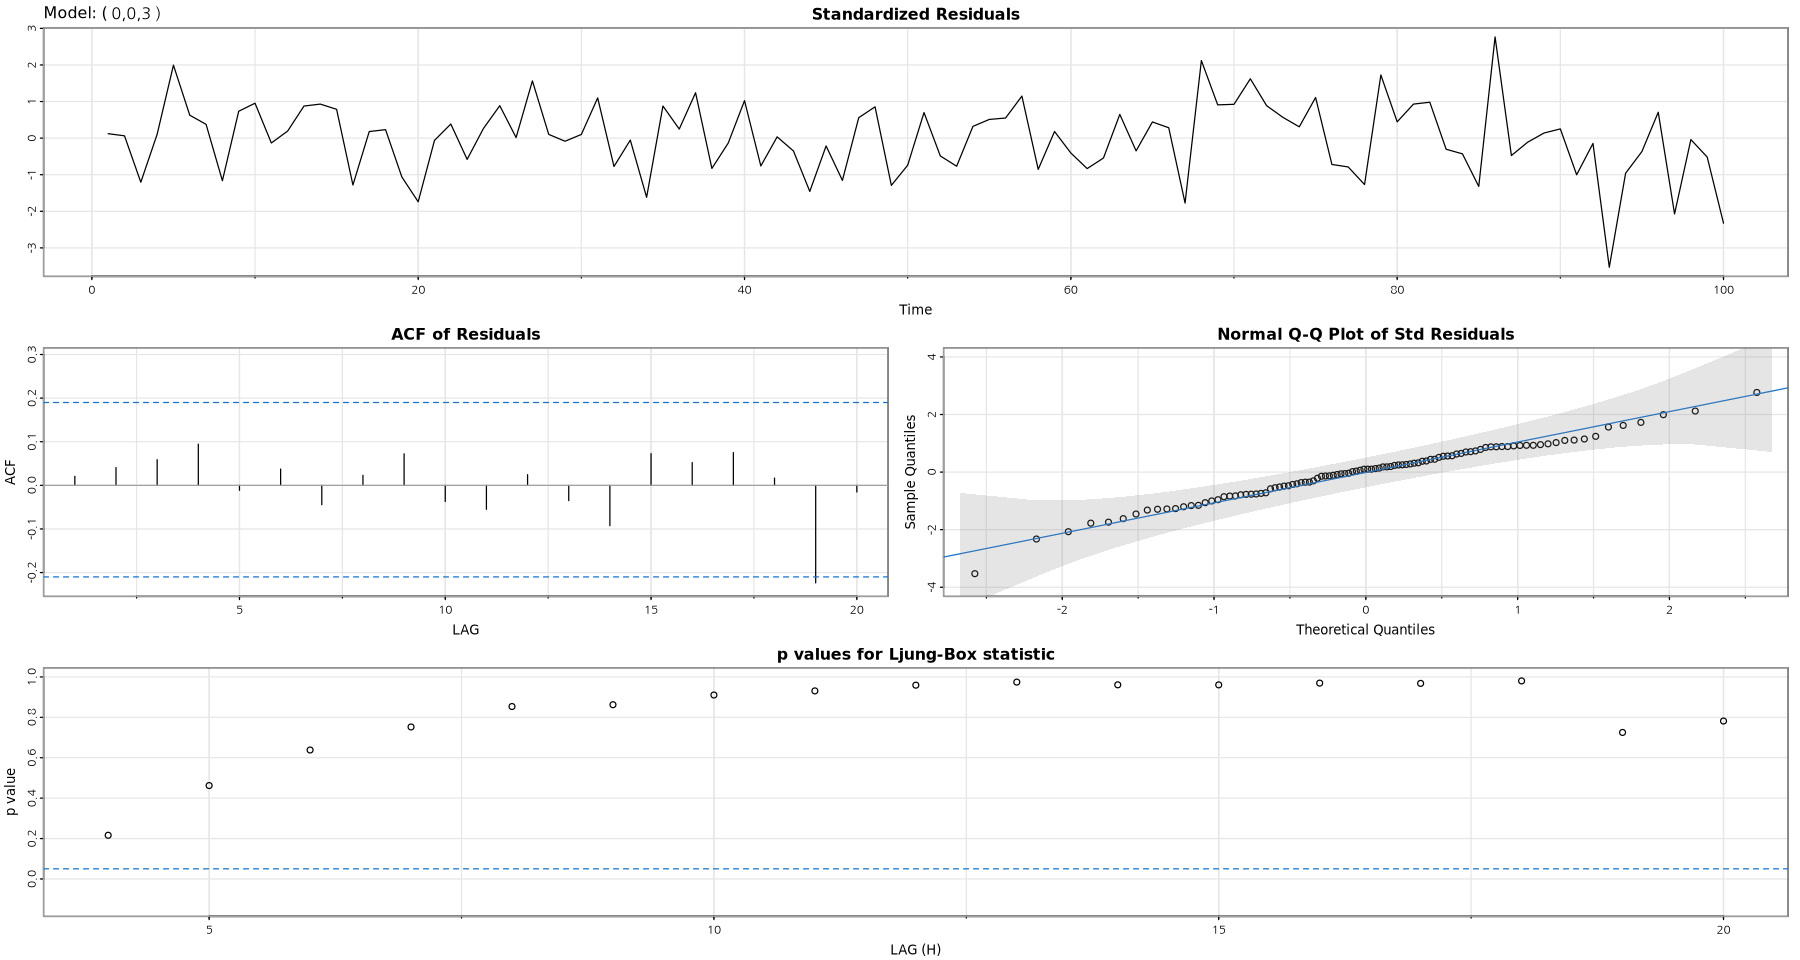

In [26]:
astsa::sarima(z2, p=0, d=0, q=3)

### 4번 문제

In [ ]:
## data
ex7_3 = scan("ex7_3.txt")

#---------(1) Zt의 시계열 그림---------
ts.plot(ex7_3, ylab = expression(Z[t]), main = "Time Series Plot")
acf(ex7_3)

#---------(2) 1차 차분시계열의 시계열 그림---------
diff_z = diff(ex7_3)
ts.plot(diff_z, ylab = expression(Z[t]), main = "1차 차분")

diff14_z = diff(diff_z, 4)
ts.plot(diff14_z, ylab = expression(Z[t]), main = "1차 차분 + 계절주기가 4인 계절차분")

#---------(3) 계절차분만 진행한 시계열 그림---------
diff4_z = diff(ex7_3, 4)
ts.plot(diff4_z, ylab = expression(Z[t]), main = "계절주기가 4인 계절차분")

### 5번 문제

In [ ]:
## data
ex7_4 = scan("ex7_4.txt")

#---------(1) Zt의 시계열 그림---------
ts.plot(ex7_4, ylab = expression(Z[t]), main = "Time Series Plot")

#---------(2) 1차 차분시계열의 시계열 그림--------
diff_z = diff(ex7_4)
ts.plot(diff_z, ylab = expression(Z[t]), main = "1차 차분")

#---------(3) 계절차분된 시계열 그림---------
diff4_z = diff(ex7_4, 4)
ts.plot(diff4_z, ylab = expression(Z[t]), main = "계절주기가 4인 계절차분")

#---------(4) 계절차분 + 차분---------
diff14_z = diff(diff4_z)
ts.plot(diff14_z, ylab = expression(Z[t]), main = "계절주기가 4인 계절차분 + 1차 차분")